In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML/updated/BXPH_HistoricalPrices - BXPH_HistoricalPrices.csv')

In [5]:
df

,Date,Open,High,Low,Close,Volume
0,1997-07-07,20.16,20.16,20.16,20.16,1.986573e+05
1,1997-07-08,19.43,19.43,19.43,19.43,2.064279e+05
2,1997-07-09,19.63,19.63,19.63,19.63,1.233162e+05
3,1997-07-10,19.73,19.73,19.73,19.73,1.128428e+05
4,1997-07-14,18.74,18.74,18.74,18.74,1.293975e+05
...,...,...,...,...,...,...
4612,2022-08-04,159.50,162.00,156.40,160.00,1.219504e+06
4613,2022-08-08,161.00,161.00,155.50,155.80,5.334040e+05
4614,2022-08-10,156.00,156.90,150.20,150.90,5.879270e+05
4615,2022-08-11,150.60,152.50,148.80,150.20,2.207540e+05


In [6]:
df = df[['Date', 'Close']]
df.head(10)

,Date,Close
0,1997-07-07,20.16
1,1997-07-08,19.43
2,1997-07-09,19.63
3,1997-07-10,19.73
4,1997-07-14,18.74
5,1997-07-16,18.37
6,1997-07-17,18.18
7,1997-07-21,17.03
8,1997-07-22,17.36
9,1997-07-23,17.31


In [7]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1998-08-23')
datetime_object

datetime.datetime(1998, 8, 23, 0, 0)

In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df['Date']

0      1997-07-07
1      1997-07-08
2      1997-07-09
3      1997-07-10
4      1997-07-14
          ...    
4612   2022-08-04
4613   2022-08-08
4614   2022-08-10
4615   2022-08-11
4616   2022-08-16
Name: Date, Length: 4617, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')

In [11]:
df.index

DatetimeIndex(['1997-07-07', '1997-07-08', '1997-07-09', '1997-07-10',
               '1997-07-14', '1997-07-16', '1997-07-17', '1997-07-21',
               '1997-07-22', '1997-07-23',
               ...
               '2022-07-27', '2022-07-28', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-08', '2022-08-10',
               '2022-08-11', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=4617, freq=None)

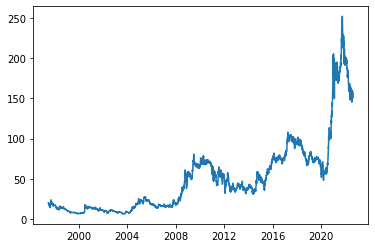

In [12]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [13]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  #print(target_date)
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+2)
    #print(df_subset)
    
    if len(df_subset) != n+2:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=100)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n+1):
    X[:, i]
    ret_df[f'Target-{n+1-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df



In [14]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1998-08-23', 
                                '2022-08-11',                         
                                n=5)
windowed_df

,Target Date,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,1998-08-23,14.31,14.56,14.98,14.61,14.64,14.90,13.63
1,1998-08-26,14.98,14.61,14.64,14.90,13.63,13.21,12.92
2,1998-08-27,14.61,14.64,14.90,13.63,13.21,12.92,12.88
3,1998-08-31,14.64,14.90,13.63,13.21,12.92,12.88,13.01
4,1998-09-01,14.90,13.63,13.21,12.92,12.88,13.01,13.30
...,...,...,...,...,...,...,...,...
4458,2022-08-03,146.20,149.20,146.30,146.00,149.10,154.90,159.30
4459,2022-08-04,149.20,146.30,146.00,149.10,154.90,159.30,160.00
4460,2022-08-08,146.30,146.00,149.10,154.90,159.30,160.00,155.80
4461,2022-08-10,146.00,149.10,154.90,159.30,160.00,155.80,150.90


In [15]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((4463,), (4463, 6, 1), (4463,))

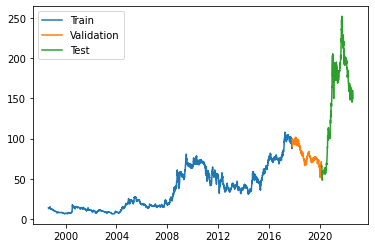

In [16]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90,]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((6, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='mse',
#     metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [18]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
112/112 [==============================] - 4s 16ms/step - loss: 488.0213 - mean_absolute_error: 11.5614 - val_loss: 3.9550 - val_mean_absolute_error: 1.5271
Epoch 2/100
112/112 [==============================] - 1s 10ms/step - loss: 1.5886 - mean_absolute_error: 0.8316 - val_loss: 2.5379 - val_mean_absolute_error: 1.2137
Epoch 3/100
112/112 [==============================] - 1s 10ms/step - loss: 1.4151 - mean_absolute_error: 0.7607 - val_loss: 3.8888 - val_mean_absolute_error: 1.5869
Epoch 4/100
112/112 [==============================] - 1s 10ms/step - loss: 1.6009 - mean_absolute_error: 0.8499 - val_loss: 4.9535 - val_mean_absolute_error: 1.9313
Epoch 5/100
112/112 [==============================] - 1s 10ms/step - loss: 1.6048 - mean_absolute_error: 0.8376 - val_loss: 3.5090 - val_mean_absolute_error: 1.4890
Epoch 6/100
112/112 [==============================] - 1s 10ms/step - loss: 1.5301 - mean_absolute_error: 0.8198 - val_loss: 1.7688 - val_mean_absolute_error: 0.9451
E

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 6

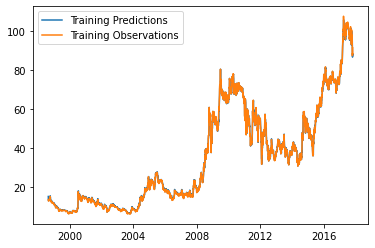

In [20]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
results = model.evaluate(X_train, y_train)

 50/112 [============>.................] - ETA: 0s - loss: 0.1742 - mean_absolute_error: 0.3057

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation = 45)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation = 45)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])